In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import phik 
from phik.report import plot_correlation_matrix
from phik import report

# LOADING DATASET

In [43]:
df = pd.read_csv("/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv")

In [44]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [46]:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [49]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [50]:
df['days_since_prior_order']=df['days_since_prior_order'].fillna('0')

In [51]:
df['days_since_prior_order']=df['days_since_prior_order'].astype(int)

# Number of purchase by day****

array([<AxesSubplot:ylabel='count'>], dtype=object)

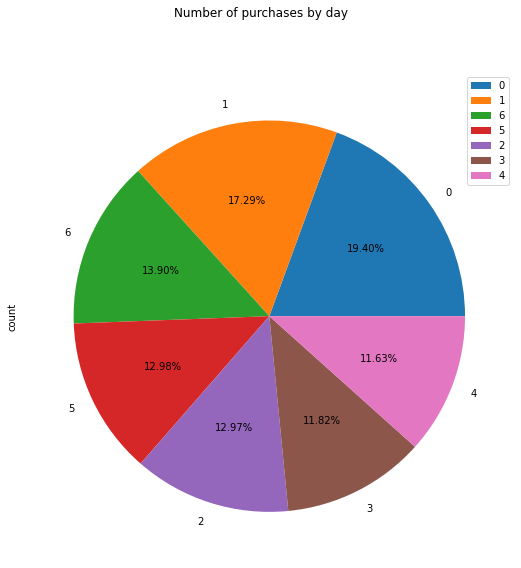

In [52]:
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Number of purchases by day',figsize=(9,9))

# Time of day, when the order was made****

In [53]:
df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)

,order_hour_of_day,user_id
10,10,173306
11,11,170291
14,14,167831
15,15,167157
13,13,166376
12,12,163511
16,16,158247
9,9,150248
17,17,129383
8,8,106754


In [54]:
def order_time(x):
    if x in [6,7,8,9,10,11,12]:
        return 'The order was made in the morning'
    if x in [13,14,15,16,17]:
        return 'The order was made in the afternoon'
    if x in [18,19,20,21,22]:
        return 'The order was made in the evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'The order was made at night'
    return x

In [55]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)

In [56]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,The order was made in the evening
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,The order was made in the evening
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,The order was made in the evening
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,The order was made in the evening
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,The order was made in the evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,The order was made in the evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,The order was made in the evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,The order was made in the evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,The order was made in the evening


<AxesSubplot:title={'center':'Time of day when, the order was made'}, xlabel='order_time_list'>

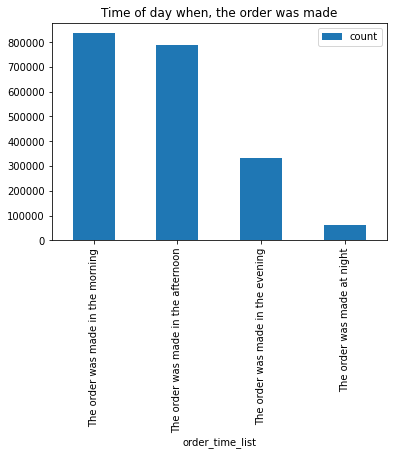

In [57]:
df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',title='Time of day when, the order was made')

# The time when the order was made by day and time of day 

In [58]:
df.pivot_table(index='order_dow',columns='order_time_list',values='user_id',aggfunc=['count'])

count  \
order_time_list The order was made at night   
order_dow                                     
0                                     11157   
1                                      8850   
2                                      7926   
3                                      7199   
4                                      8017   
5                                      8607   
6                                      9544   

                                                     \
order_time_list The order was made in the afternoon   
order_dow                                             
0                                            162933   
1                                            130205   
2                                            100223   
3                                             94072   
4                                             89207   
5                                            101113   
6                                            111241   

                                                   \
order_time_list The order was made in the evening   
order_dow                                           
0                                           60195   
1                                           51825   
2                                           45497   
3                                           41737   
4                                           45359   
5                                           42311   
6                                           45737   

                                                   
order_time_list The order was made in the morning  
order_dow                                          
0                                          157546  
1                                          158356  
2                                          108266  
3                                           95722  
4                                           92301  
5                                          110126  
6                                          114229

<AxesSubplot:title={'center':'The time when the order was made by day and time of day'}, xlabel='order_dow'>

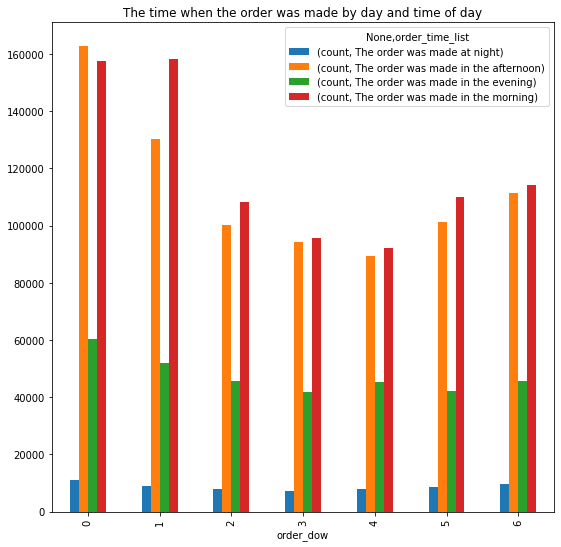

In [59]:
df.pivot_table(index='order_dow',columns='order_time_list',values='user_id',aggfunc=['count']).plot(kind='bar',
                                                                                                    title='The time when the order was made by day and time of day',figsize=(9,9))

# ****The number of order users has made

In [60]:
df.groupby('order_number')['user_id'].agg(['count'])

,count
order_number,
1,124342
2,122397
3,120627
4,118573
5,105482
...,...
96,1051
97,834
98,964


In [61]:
def order_number_group(x):
    if x <= 20 :
        x= '1-20 orders'
    elif x >20 and x <=40:
        x= '21-40 orders'
    elif x >40 and x <=60:
        x= '41-60 orders'
    elif x >60 and x <=80:
        x= '61-80 orders'
    else:
        x= '81-100 orders'
    return x

In [62]:
df['order_number_group']=df['order_number'].apply(order_number_group)

In [63]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,order_number_group
0,2425083,49125,1,2,18,0,17,1,0,13,pantry,baking ingredients,The order was made in the evening,1-20 orders
1,2425083,49125,1,2,18,0,91,2,0,16,dairy eggs,soy lactosefree,The order was made in the evening,1-20 orders
2,2425083,49125,1,2,18,0,36,3,0,16,dairy eggs,butter,The order was made in the evening,1-20 orders
3,2425083,49125,1,2,18,0,83,4,0,4,produce,fresh vegetables,The order was made in the evening,1-20 orders
4,2425083,49125,1,2,18,0,83,5,0,4,produce,fresh vegetables,The order was made in the evening,1-20 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,The order was made in the evening,1-20 orders
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,The order was made in the evening,41-60 orders
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,The order was made in the evening,41-60 orders
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,The order was made in the evening,41-60 orders


array([<AxesSubplot:ylabel='count'>], dtype=object)

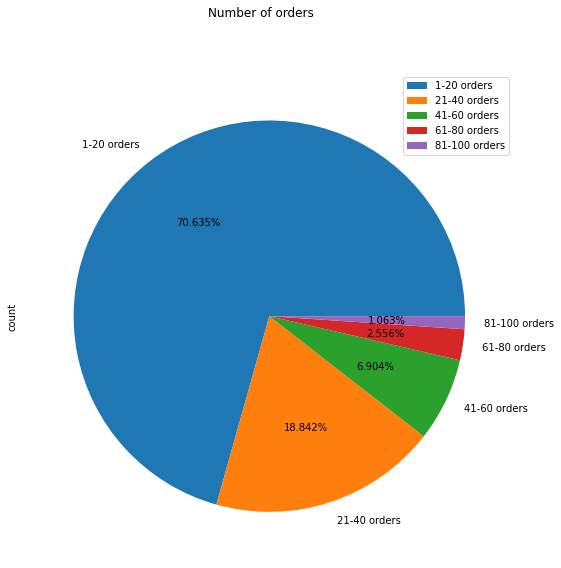

In [64]:
df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',
                                                                                                        autopct='%1.3f%%',subplots=True,title='Number of orders',figsize=(9,9))

# ****How many days have passed since the pre-order

<AxesSubplot:title={'center':'Days since prior order'}, xlabel='days_since_prior_order'>

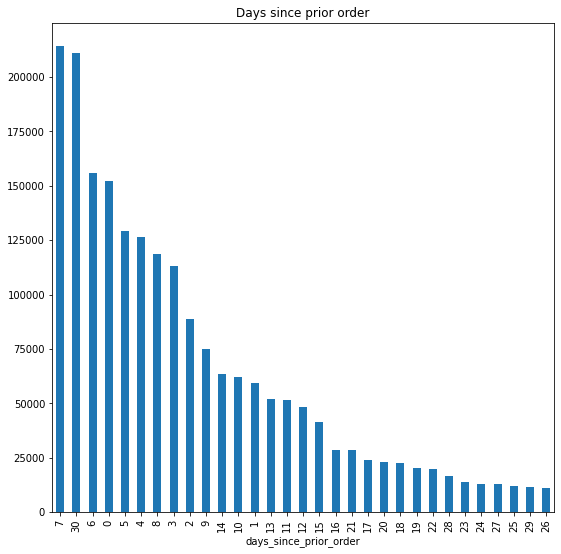

In [65]:
df.groupby('days_since_prior_order')['user_id'].agg('count').sort_values(ascending=
                                                                         False).plot(kind='bar',title='Days since prior order',figsize=(9,9))

array([<AxesSubplot:ylabel='count'>], dtype=object)

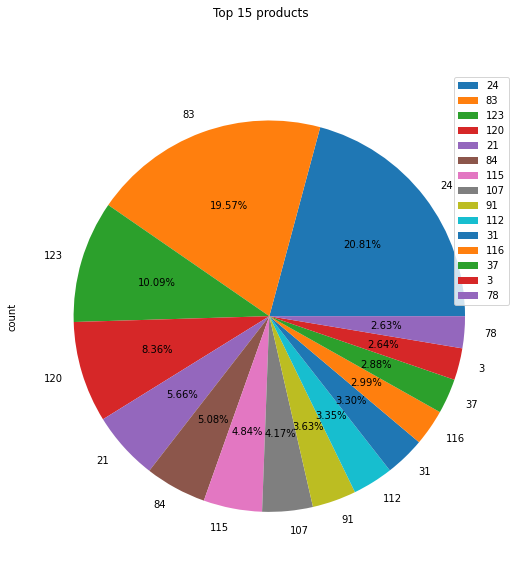

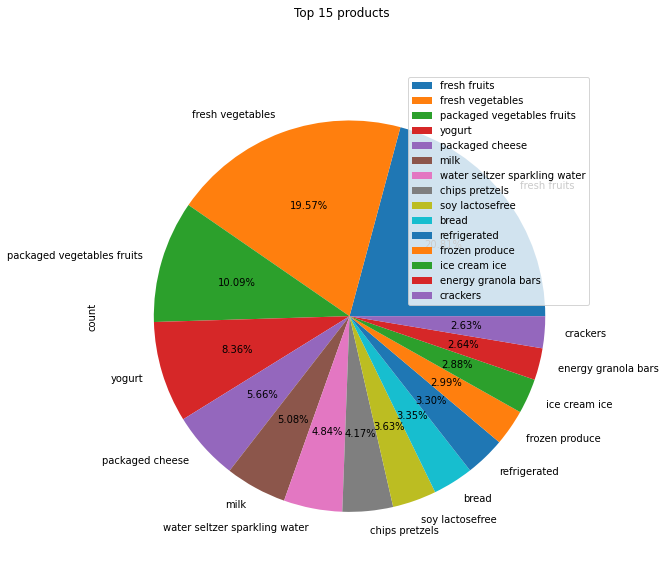

In [66]:
df.groupby('product_id')['user_id'].agg(['count']).sort_values(by='count',ascending=False).head(15).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Top 15 products',figsize=(9,9))
df.groupby('product_name')['user_id'].agg(['count']).sort_values(by='count',ascending=False).head(15).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Top 15 products',figsize=(9,9))

# How many products users add to the cart****

In [67]:
atco_u=df.groupby('add_to_cart_order',as_index=False).agg({'user_id': 'count'}).sort_values(by='user_id',ascending=False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user_id'>

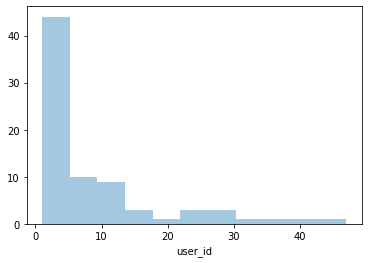

In [68]:
sns.distplot(atco_u.query('user_id<50').user_id, kde=False)

# Reorderes****

In [69]:
df['reordered'].value_counts()

1    1190986
0     828515
Name: reordered, dtype: int64

<AxesSubplot:title={'center':'Reordereds'}, ylabel='department'>

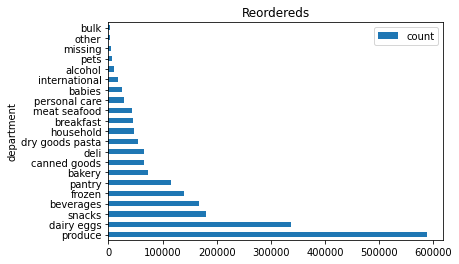

In [70]:
df.groupby('department')['reordered'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh', title='Reordereds')

array([<AxesSubplot:ylabel='count'>], dtype=object)

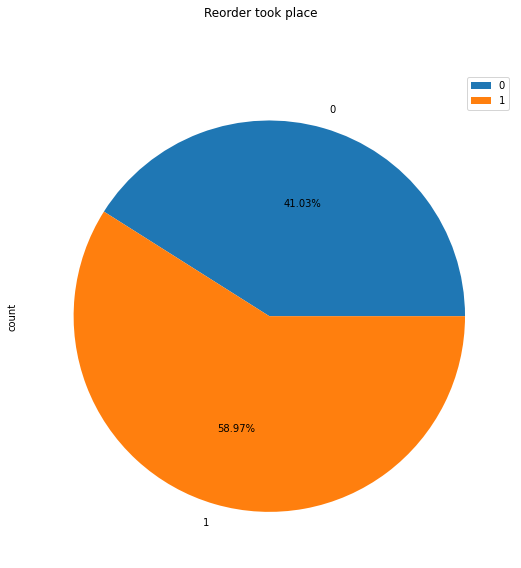

In [71]:
df.groupby('reordered')['user_id'].agg(['count']).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Reorder took place',figsize=(9,9))

array([<AxesSubplot:ylabel='count'>], dtype=object)

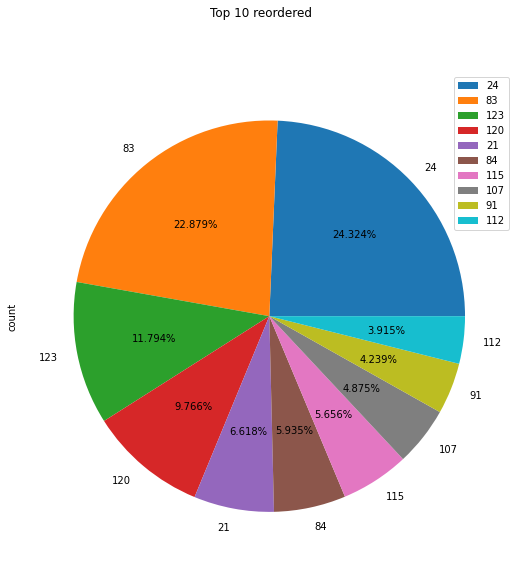

In [72]:
df.groupby('product_id')['reordered'].agg(['count']).sort_values(by='count',ascending=False).head(10).plot(kind='pie',autopct='%1.3f%%',subplots=True,title='Top 10 reordered',figsize=(9,9))

# Predicted****

In [73]:
df_2=df.copy()

In [74]:
df_2['department']=pd.factorize(df_2.department)[0]
df_2['product_name']=pd.factorize(df_2.product_name)[0]
df_2['order_time_list']=pd.factorize(df_2.order_time_list)[0]
df_2['order_number_group']=pd.factorize(df_2.order_number_group)[0]

In [75]:
df_2.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,order_number_group
order_id,1.000000,0.000515,0.004791,0.002015,0.001039,-0.001407,0.000114,-0.003230,0.002207,0.000691,-0.000309,0.000051,-0.001932,0.002050
user_id,0.000515,1.000000,-0.003244,-0.001796,-0.002050,-0.000456,0.000300,0.001180,-0.001780,0.001475,0.001004,0.000816,-0.000636,-0.001968
order_number,0.004791,-0.003244,1.000000,0.013848,-0.038352,-0.264725,0.000227,-0.000380,0.302881,0.001811,-0.016861,-0.025992,0.033759,0.737192
order_dow,0.002015,-0.001796,0.013848,1.000000,0.010854,-0.028193,-0.001458,-0.009274,-0.008689,0.003504,0.008827,0.012619,-0.007459,0.009695
order_hour_of_day,0.001039,-0.002050,-0.038352,0.010854,1.000000,0.002037,-0.000077,-0.015119,-0.019492,-0.007886,0.001115,0.004335,-0.811832,-0.032473
days_since_prior_order,-0.001407,-0.000456,-0.264725,-0.028193,0.002037,1.000000,0.005261,0.046606,-0.031522,0.001193,0.008947,0.014973,-0.003173,-0.247537
product_id,0.000114,0.000300,0.000227,-0.001458,-0.000077,0.005261,1.000000,0.008186,0.004256,0.062107,-0.010147,0.011541,-0.000049,-0.000564
add_to_cart_order,-0.003230,0.001180,-0.000380,-0.009274,-0.015119,0.046606,0.008186,1.000000,-0.133566,0.029746,0.040189,0.067372,0.021936,0.005992
reordered,0.002207,-0.001780,0.302881,-0.008689,-0.019492,-0.031522,0.004256,-0.133566,1.000000,-0.037645,-0.057460,-0.122769,0.015182,0.251050
department_id,0.000691,0.001475,0.001811,0.003504,-0.007886,0.001193,0.062107,0.029746,-0.037645,1.000000,0.253983,0.183693,0.007069,0.003003


<AxesSubplot:>

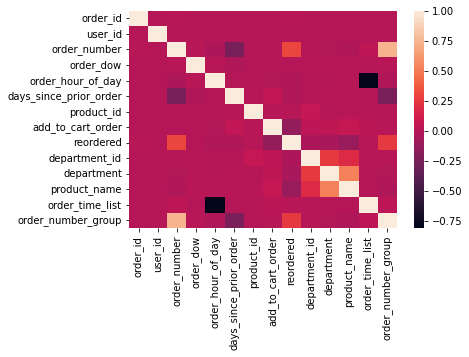

In [76]:
sns.heatmap(df_2.corr())

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, preprocessing

In [79]:
X= df_2.values[:,0:13]
Y= df_2.values[:, 13]

In [80]:
X= preprocessing.scale(X)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor()

In [83]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [84]:
score = rfr.score(X_train,y_train)
score

1.0

In [85]:
y_pred5 = rfr.predict(X_test)
rscore=r2_score(y_test, y_pred5)
rscore

1.0

In [86]:
df_2['Prediction']=rfr.predict(X)

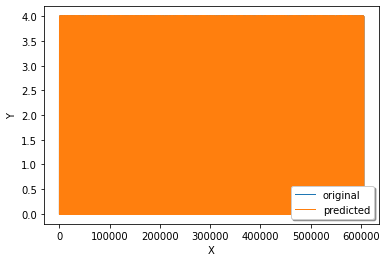

In [87]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth = '1', label="original")
plt.plot(x_ax, y_pred5, linewidth = '1', label="predicted")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right',fancybox=True, shadow=True)

plt.show()